# VI.A. Bipartite networks

In [1]:
%matplotlib inline

from infomap import Infomap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette(sns.color_palette("colorblind"))

In [3]:
def splitQuotationAware(s, sep=" "):
    res = [""]
    i   = 0
    acc = ""
    while i < len(s):
        if s[i] == sep:
            res.append("")
        elif s[i] == "\"":
            i += 1
            while i < len(s) and s[i] != "\"":
                res[-1] += s[i]
                i += 1
        else:
            res[-1] += s[i]
        i += 1

    return res

Bipartite networks have two different types of nodes, left nodes $V_L$ and right nodes $V_R$. In bipartite networks, links only connect nodes with different types which means that the random walker needs to switch between left and right nodes with every step.

We consider a plant-ant web from [1], available at [2], transformed to a net format for Infomap.

[1] C.R. Fonseca and G. Ganade, "Asymmetries, compartments and null interactions in an Amazonian ant-plant community." Journal of Animal Ecology 66, 339-347 (1996)\
[2] https://iwdb.nceas.ucsb.edu/html/fonseca_ganade_1996.htm

In [4]:
G = nx.Graph()
nodeID_to_label = dict()

with open("data/Fonseca-Ganade-weighted.net", "r") as fh:
    # skip comment
    line = fh.readline()

    # skip "*Vertices"
    line = fh.readline()

    line = fh.readline().strip()
    while not line.startswith("*"):
        ID, label = splitQuotationAware(line, sep = " ")

        nodeID_to_label[int(ID)] = label
        line = fh.readline().strip()
    
    # skip "*Bipartite 20"
    line = fh.readline().strip()
    while line:
        l,r,w = line.split(" ")
        G.add_edge(int(l), int(r), weight = int(w))
        line = fh.readline().strip()

In [5]:
# we use a manual layout...
pos = {  1 : (-4.4,-2.0)
      ,  2 : (-2.4,-2.9)
      ,  3 : (-2.0,-2.0)
      ,  4 : (-0.6,-1.5)
      ,  5 : ( 0.6,-1.6)
      ,  6 : ( 0.2, 1.0)
      ,  7 : (-1.1, 0.5)
      ,  8 : (-1.2,-0.4)
      ,  9 : (-0.7, 1.4)
      , 10 : (-3.3, 2.0)
      , 11 : (-3.8,-0.6)
      , 12 : (-2.7,-0.8)
      , 13 : (-3.6, 0.7)
      , 14 : ( 3.3, 1.5)
      , 15 : ( 1.5, 1.4)
      , 16 : ( 2.4, 1.5)
      , 17 : ( 3.1, 0.4)
      , 18 : ( 2.8,-0.6)
      , 19 : ( 1.2,-0.5)
      , 20 : (-3.8,-3.0)
      , 21 : (-3.3,-2.1)
      , 22 : (-1.0,-2.8)
      , 23 : ( 0.4,-2.6)
      , 24 : (0,0)
      , 25 : (-2.5, 0.2)
      , 26 : (-2.2, 1.8)
      , 27 : (-4.5, 1.8)
      , 28 : ( 2.0, 2.5)
      , 29 : ( 1.9, 0.4)
      }

The standard map equation does not consider node types. Therefore, all nodes "look the same".

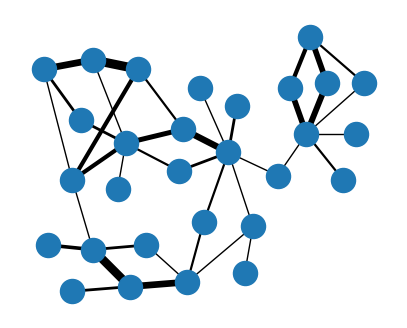

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (5,4))
nodelist = sorted(G.nodes)
edgelist = sorted(G.edges)
nx.draw_networkx_nodes(G = G, pos = pos, ax = ax)
nx.draw_networkx_edges(G = G, pos = pos, ax = ax, edgelist = edgelist, width = [np.log2(1 + G.get_edge_data(*e)["weight"]) for e in edgelist])
ax.axis("off")
plt.show()

In [7]:
im = Infomap(silent = True, two_level = True, num_trials = 10)
im.add_networkx_graph(G)
im.run()

unipartite_modules = dict(im.modules)

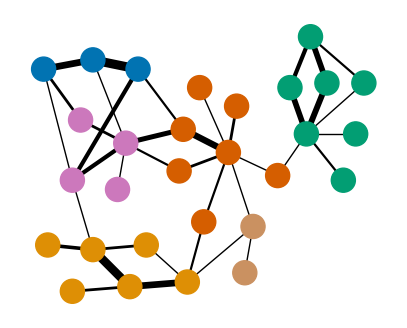

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (5,4))
nodelist = sorted(G.nodes)
edgelist = sorted(G.edges)
nx.draw_networkx_nodes(G = G, pos = pos, ax = ax, nodelist = nodelist, node_color = [sns.color_palette()[unipartite_modules[node]-1] for node in nodelist])
nx.draw_networkx_edges(G = G, pos = pos, ax = ax, edgelist = edgelist, width = [np.log2(1 + G.get_edge_data(*e)["weight"]) for e in edgelist])
ax.axis("off")
plt.show()

The bipartite map equation distinguishes between left and right nodes.

In [9]:
# get bipartite Infomap and compile it
!git clone -b feature/bipartite-mapequation https://github.com/mapequation/infomap.git bipartite-infomap
!cd bipartite-infomap && make

Cloning into 'bipartite-infomap'...
remote: Enumerating objects: 11323, done.
remote: Counting objects: 100% (1334/1334), done.
remote: Compressing objects: 100% (374/374), done.
remote: Total 11323 (delta 1138), reused 992 (delta 960), pack-reused 9989
Receiving objects: 100% (11323/11323), 17.67 MiB | 9.35 MiB/s, done.
Resolving deltas: 100% (8289/8289), done.
g++ -Wall -Wextra -Wno-unused-parameter -std=c++14 -O4 -fopenmp -c src/Infomap.cpp -o build/Infomap/Infomap.o
g++ -Wall -Wextra -Wno-unused-parameter -std=c++14 -O4 -fopenmp -c src/core/InfoNode.cpp -o build/Infomap/core/InfoNode.o
g++ -Wall -Wextra -Wno-unused-parameter -std=c++14 -O4 -fopenmp -c src/core/MapEquation.cpp -o build/Infomap/core/MapEquation.o
g++ -Wall -Wextra -Wno-unused-parameter -std=c++14 -O4 -fopenmp -c src/core/DoublePair.cpp -o build/Infomap/core/DoublePair.o
g++ -Wall -Wextra -Wno-unused-parameter -std=c++14 -O4 -fopenmp -c src/core/ClusterMap.cpp -o build/Infomap/core/ClusterMap.o
g++ -Wall -Wextra -Wno-

In [10]:
# run bipartite Infomap on the network
!bipartite-infomap/Infomap data/Fonseca-Ganade-weighted.net output --silent --two-level

In [11]:
bipartite_modules = {}

with open("output/Fonseca-Ganade-weighted.tree", "r") as fh:
    line = fh.readline().strip()
    while line.startswith("#"):
        line = fh.readline().strip()
    
    while line:
        module, _flow, _label, nodeID = splitQuotationAware(line)
        bipartite_modules[int(nodeID)] = int(module.split(":")[0])
        line = fh.readline().strip()

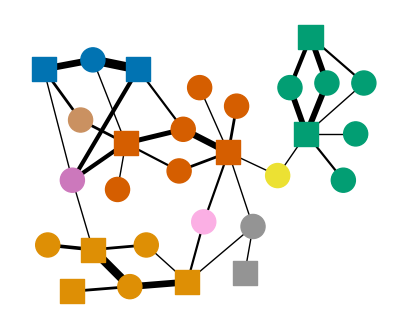

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (5,4))
leftnodes  = [node for node in G.nodes if node <  20]
rightnodes = [node for node in G.nodes if node >= 20]
edgelist   = sorted(G.edges)
nx.draw_networkx_nodes(G = G, pos = pos, ax = ax, nodelist = leftnodes, node_color = [sns.color_palette()[bipartite_modules[node]-1] for node in leftnodes], node_shape = "o")
nx.draw_networkx_nodes(G = G, pos = pos, ax = ax, nodelist = rightnodes, node_color = [sns.color_palette()[bipartite_modules[node]-1] for node in rightnodes], node_shape = "s")
nx.draw_networkx_edges(G = G, pos = pos, ax = ax, edgelist = edgelist, width = [np.log2(1 + G.get_edge_data(*e)["weight"]) for e in edgelist])
ax.axis("off")
plt.show()

However, in sparse network regions, knowing the node type is "too much" information and causes Infomap to place some nodes into their own singleton modules. Instead, we can use node types at some intermediate rate to control this effect. Setting the node-type flipping rate to 0.5 recovers the standard map equation.

In [13]:
!bipartite-infomap/Infomap data/Fonseca-Ganade-weighted.net output --silent --two-level --node-type-flipping-rate 0.25

In [14]:
mixed_modules = {}

with open("output/Fonseca-Ganade-weighted.tree", "r") as fh:
    line = fh.readline().strip()
    while line.startswith("#"):
        line = fh.readline().strip()
    
    while line:
        module, _flow, _label, nodeID = splitQuotationAware(line)
        mixed_modules[int(nodeID)] = int(module.split(":")[0])
        line = fh.readline().strip()

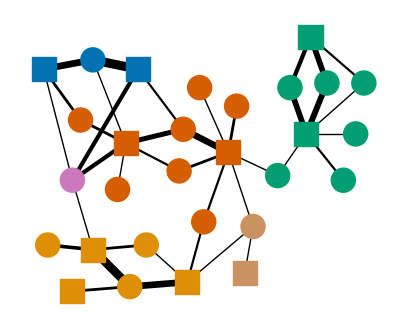

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (5,4))
leftnodes  = [node for node in G.nodes if node <  20]
rightnodes = [node for node in G.nodes if node >= 20]
edgelist = sorted(G.edges)
nx.draw_networkx_nodes(G = G, pos = pos, ax = ax, nodelist = leftnodes, node_color = [sns.color_palette()[mixed_modules[node]-1] for node in leftnodes], node_shape = "o")
nx.draw_networkx_nodes(G = G, pos = pos, ax = ax, nodelist = rightnodes, node_color = [sns.color_palette()[mixed_modules[node]-1] for node in rightnodes], node_shape = "s")
nx.draw_networkx_edges(G = G, pos = pos, ax = ax, edgelist = edgelist, width = [np.log2(1 + G.get_edge_data(*e)["weight"]) for e in edgelist])
ax.axis("off")
plt.show()